# POROUT BY CONSUMO
* Consumo

## Proximos pasos
* terminar grupos std, avg y trend
* convertir trend (y std, pensar) en categoricas
* eliminar columnas base
* seguir con cluster
* comparaciones respecto al porout, tablas de proporciones

In [129]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
from itertools import compress
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [4]:
#path_data = ''
#file= f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202107.csv'
df07 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202107.csv', sep='|', decimal='.')
df06 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202106.csv', sep='|', decimal='.')
df05 = pd.read_csv(f'GAAVANZADA.TBL_PORTOUT_PREPAGO_202105.csv', sep='|', decimal='.')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,63,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,5,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df07['file']='df07'
df06['file']='df06'
df05['file']='df05'

In [6]:
print(len(df07))
print(len(df06))
print(len(df05))

3111611
3101845
3091322


In [7]:
df=df05
df=df.append(df06)
df=df.append(df07)

In [8]:
del df05
del df06
del df07
gc.collect()

15

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304778 entries, 0 to 3111610
Data columns (total 80 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   CO_ID                                 int64  
 1   CUSTOMER_ID                           int64  
 2   CUSTCODE                              object 
 3   TELE_NUMB                             int64  
 4   TELE_NUMB_COMPLETO                    int64  
 5   IDENTIFICACION                        object 
 6   FECHA_ACTIVACION_BSCS                 object 
 7   POROUT                                int64  
 8   REGION_SIT                            object 
 9   MUNICIPIO_SIT                         object 
 10  DEPTO_SIT                             object 
 11  REGION_SIT_NOCHE                      object 
 12  MUNICIPIO_SIT_NOCHE                   object 
 13  DEPTO_SIT_NOCHE                       object 
 14  REGION_SIT_M1                         object 
 15  MUNICIPIO_SIT_M

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_ID,9304778.000,302450781.898,53892599.282,2794121.000,280525794.250,324228968.500,339973052.250,352353868.000
CUSTOMER_ID,9304778.000,311718146.609,54598731.195,478847.000,290008923.250,333737501.500,349490263.250,361878975.000
TELE_NUMB,9304778.000,3167513304.808,67581061.036,455025681.000,3124090186.500,3145285759.000,3216902983.500,3508997887.000
TELE_NUMB_COMPLETO,9304778.000,573051237881.578,7762776260.372,57455025681.000,573124090186.500,573145285759.000,573216902983.500,573508997887.000
POROUT,9304778.000,0.033,0.178,0.000,0.000,0.000,0.000,1.000
PROM_SEGUNDOS_MA,4080708.000,303.242,322.627,0.000,104.886,212.500,393.012,36231.500
PROM_SEGUNDOS_M1,4040402.000,307.539,327.997,0.000,105.625,215.065,398.593,30830.300
PROM_SEGUNDOS_M2,4047358.000,306.863,329.147,0.000,105.964,214.550,396.750,49784.526
PROM_SEGUNDOS_M3,4043793.000,307.486,329.710,0.000,105.667,214.240,397.106,34042.000
PROM_SEGUNDOS_M4,2980213.000,316.697,331.585,0.000,112.840,224.316,409.687,29007.235


In [11]:
len(df)

9304778

In [12]:
def tipoDocumento(dni):    
    #text='9005514169.0'
    pos=dni.find('.')
    if pos != -1:
        dni=dni[0:pos]    
    longitud=len(dni)
    inicial=dni[0]
    respuesta="desconocido"
    if (longitud == 9 or longitud==10) and (inicial=='9' or inicial=='8'):
        respuesta="NIT"
    elif (longitud == 7 or longitud==8):
        respuesta="cedula"
    elif (longitud == 10) and (inicial=='1'):
        respuesta="cedula"
    elif longitud<=6:
        respuesta="sin id"
    return respuesta

In [13]:
#tipoDocumento('9005514169.0')

In [14]:
###  contar nullos en identificacion
df['IDENTIFICACION'].isnull().sum()

5

In [15]:
df['IDENTIFICACION'].fillna(0, inplace=True)

In [16]:
df['IDENTIFICACION']=df[['IDENTIFICACION']].applymap(str) 

#### Próximos pasos
* descartar columnas sin información



In [17]:
df['tipo_id']=df['IDENTIFICACION'].apply(tipoDocumento)

In [18]:
len(df)

9304778

In [19]:
df['tipo_id'].value_counts()

NIT            8260485
cedula          950408
sin id           65334
desconocido      28551
Name: tipo_id, dtype: int64

In [20]:
df[df['tipo_id']=='desconocido'].sample(20)

,CO_ID,CUSTOMER_ID,CUSTCODE,TELE_NUMB,TELE_NUMB_COMPLETO,IDENTIFICACION,FECHA_ACTIVACION_BSCS,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,CANT_SMS_MA,CANT_SMS_M1,CANT_SMS_M2,CANT_SMS_M3,CANT_SMS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_WAZE,TOTAL_MB_YOUTUBE,TOTAL_MB_SPOTIFY,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON2_MA,RAZON3_MA,RAZON1_M1,RAZON2_M1,RAZON3_M1,RAZON1_M2,RAZON2_M2,RAZON3_M2,RAZON1_M3,RAZON2_M3,RAZON3_M3,RAZON1_M4,RAZON2_M4,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,file,tipo_id
2026279,263584404,273047696,2.181891364,3103182285,573103182285,934511121,2018-08-10 20:12:31.0,0,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,703.986,1202.484,537.477,632.542,1255.941,5228.917,3997.354,4739.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,NaN,NaN,NaN,2535.224,1794.317,1965.418,1007.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
1791682,284741865,294228326,2.200626015,3225946554,573225946554,777777777,2019-05-27 15:09:11.0,0,Centro,Sibate,Cundinamarca,Centro,Sibate,Cundinamarca,NaN,NaN,NaN,NaN,NaN,NaN,59.913,58.067,141.714,68.333,61.067,1850225.003,1523765.389,1100436.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.000,1060.000,4.000,30.000,0.000,19.000,0.000,0.000,2315.000,NaN,NaN,NaN,733.820,1488.820,1319.304,735.000,0.000,1.000,1.000,-1000.000,Navegacion 50 MB 1 Dia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
1933671,276802441,286282522,2.193677930,3229308703,573229308703,777777777,2019-02-02 13:36:07.0,0,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,191.984,140.750,113.756,80.957,60.278,825963.164,569516.271,2424990.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,49.000,0.000,2.000,0.000,8.000,0.000,0.000,187.000,5.000,-5000.000,Navegacion 50 MB 1 Dia,4577.405,1801.737,602.051,847.000,1000.000,1.000,2.000,-2000.000,Navegacion 50 MB 1 Dia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
1950867,269129719,278603923,2.186845514,3203754042,573203754042,741805941,2018-10-24 08:52:27.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.500,299.000,62.909,87.833,86.375,28.311,85.920,2610464.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
446157,225059554,234188681,2.147548437,3213834023,573213834023,132454833,2017-01-10 17:51:35.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,desconocido
2164692,273757368,283235342,2.190970576,3106210409,573106210409,777777777,2018-12-21 19:33:02.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.000,329.786,125.000,132.571,132.944

In [21]:
"""text='9005514169.0'
pos=text.find('.')
text[0:pos]
text[0:-1]"""

"text='9005514169.0'\npos=text.find('.')\ntext[0:pos]\ntext[0:-1]"

###  Filtrar solo documentos con cédulas

In [22]:
df=df[df['tipo_id']=='cedula']

In [23]:
len(df)

950408

In [24]:
df['POROUT'].value_counts()

0    749131
1    201277
Name: POROUT, dtype: int64

In [25]:
# agrupación por identificación
#df[['CO_ID']].groupby(by=['CO_ID']).count()
dup=df[['CO_ID','file']].value_counts().to_frame().sort_values(by=0, ascending=False)

In [26]:
dup.head(2)

,,0
CO_ID,file,
342999931,df05,2
242427134,df06,2


In [27]:
dup[0].value_counts()

1    950400
2         4
Name: 0, dtype: int64

In [28]:
dup[dup[0]==2]

,,0
CO_ID,file,
342999931,df05,2
242427134,df06,2
292720715,df05,2
343443993,df05,2


In [29]:
df[df['CO_ID']==292720715]

,CO_ID,CUSTOMER_ID,CUSTCODE,TELE_NUMB,TELE_NUMB_COMPLETO,IDENTIFICACION,FECHA_ACTIVACION_BSCS,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,CANT_SMS_MA,CANT_SMS_M1,CANT_SMS_M2,CANT_SMS_M3,CANT_SMS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_WAZE,TOTAL_MB_YOUTUBE,TOTAL_MB_SPOTIFY,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON2_MA,RAZON3_MA,RAZON1_M1,RAZON2_M1,RAZON3_M1,RAZON1_M2,RAZON2_M2,RAZON3_M2,RAZON1_M3,RAZON2_M3,RAZON3_M3,RAZON1_M4,RAZON2_M4,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,file,tipo_id
1027770,292720715,302211904,2.207685723,3222684268,573222684268,8768800,2019-08-30 13:56:19.0,0,Costa,Cartagena De Indias,Bolivar,Costa,Cartagena De Indias,Bolivar,NaN,NaN,NaN,NaN,NaN,NaN,251.000,NaN,70.800,20.000,16.333,350.229,898.288,2127.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,646.774,NaN,NaN,509.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,cedula
1166204,292720715,302211904,2.207685723,3222684268,573222684268,8768800,2019-08-30 13:56:19.0,0,Centro,Bogota D C,Cundinamarca,Centro,Bogota D C,Cundinamarca,NaN,NaN,NaN,NaN,NaN,NaN,251.000,NaN,70.800,20.000,16.333,350.229,898.288,2127.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,646.774,NaN,NaN,509.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,cedula


In [30]:
## quitar duplicados
len(df)

950408

In [31]:
df.drop_duplicates(subset=['CO_ID','file'], inplace=True)

In [32]:
df['POROUT'].isnull().sum()

0

In [33]:
td_df=pd.pivot_table(df, index='CO_ID', columns='file', values='POROUT', aggfunc=np.sum, fill_value=0)

In [34]:
td_df['sel_porout']=td_df.max(axis=1)

In [35]:
td_df.head(10)

file,df05,df06,df07,sel_porout
CO_ID,,,,
7045723,0,0,0,0
7153200,0,1,0,1
7166147,0,1,0,1
7236526,1,0,0,1
7360814,0,0,1,1
7360991,0,0,1,1
7407412,0,1,0,1
7414201,0,0,0,0
7490807,0,0,1,1


In [36]:
td_df['sel_porout'].value_counts()

0    647047
1    201274
Name: sel_porout, dtype: int64

In [37]:
td_df['sel_porout'].value_counts()/len(td_df)

0   0.763
1   0.237
Name: sel_porout, dtype: float64

### Selección de variables

In [38]:
### varibles sin información

In [39]:
df.columns.values

array(['CO_ID', 'CUSTOMER_ID', 'CUSTCODE', 'TELE_NUMB',
       'TELE_NUMB_COMPLETO', 'IDENTIFICACION', 'FECHA_ACTIVACION_BSCS',
       'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT', 'DEPTO_SIT',
       'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE', 'DEPTO_SIT_NOCHE',
       'REGION_SIT_M1', 'MUNICIPIO_SIT_M1', 'DEPTO_SIT_M1',
       'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'CANT_SMS_MA', 'CANT_SMS_M1', 'CANT_SMS_M2',
       'CANT_SMS_M3', 'CANT_SMS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_WAZE', 'TOTAL_MB_YOUTUBE',
       'TOTAL_MB_SPOTIFY', 'TOTAL_MB_GOOGLE_MAPS', 'CONSUMO_TOTAL_MB',
       'CANT_PAQ_MAS_COMPRADO_MES', 'VLR_PAQ_MAS_COMPRADO_MES',
       'NOMBRE_PAQ_MAS_COMPR

In [40]:
variablesSinInfo=df.nunique().to_frame()

In [41]:
## variables id


In [42]:
variablesSinInfo

,0
CO_ID,848321
CUSTOMER_ID,848321
CUSTCODE,896094
TELE_NUMB,848262
TELE_NUMB_COMPLETO,848262
IDENTIFICACION,192838
FECHA_ACTIVACION_BSCS,760609
POROUT,2
REGION_SIT,5
MUNICIPIO_SIT,986


In [43]:
df['TOTAL_MB_WAZE'].value_counts()

0.000    423945
Name: TOTAL_MB_WAZE, dtype: int64

# Sin información de Waze o Spotify

In [44]:
variablesSinInfo[variablesSinInfo[0]<=1]

,0
CANT_SMS_MA,0
CANT_SMS_M1,0
CANT_SMS_M2,0
CANT_SMS_M3,0
CANT_SMS_M4,0
TOTAL_MB_WAZE,1
TOTAL_MB_SPOTIFY,1
RAZON2_MA,0
RAZON3_MA,0
RAZON2_M1,0


In [45]:
### eliminar columnas sin info
df.drop(columns=variablesSinInfo[variablesSinInfo[0]<=1].index.values, inplace=True)

In [46]:
### columnas ID
col_id=['CUSTOMER_ID','CUSTCODE','TELE_NUMB','TELE_NUMB_COMPLETO']
# 'CO_ID' como index

In [47]:
#df.drop(columns=['TELE_NUMB_COMPLETO'], inplace=True)
df.drop(columns=col_id, inplace=True)

In [48]:
### FECHA_ACTIVACION_BSCS

In [49]:
#df['FECHA_ACTIVACION_BSCS'] = df['FECHA_ACTIVACION_BSCS'].astype('datetime64[ns]')
df['FECHA_ACTIVACION_BSCS'] = df['FECHA_ACTIVACION_BSCS'].astype('datetime64[D]')

In [50]:
#df['FECHA_ACTIVACION_BSCS'].head(2)

In [51]:
maxFecha=max(df['FECHA_ACTIVACION_BSCS'])

In [52]:
df.dtypes['FECHA_ACTIVACION_BSCS']

dtype('<M8[ns]')

In [53]:
type(maxFecha)

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
#datetime.strptime(maxFecha, '%y-%m-d%')

In [55]:
df['ACTIGUEDAD_ACT_BSCS']=maxFecha-df['FECHA_ACTIVACION_BSCS']
#df['ACTIGUEDAD_ACT_BSCS']=(maxFecha-df['FECHA_ACTIVACION_BSCS']).astype(int)

In [56]:
df['ACTIGUEDAD_ACT_BSCS']=(df['ACTIGUEDAD_ACT_BSCS']/ np.timedelta64(1, 'D')).astype(int)

In [57]:
df.dtypes['ACTIGUEDAD_ACT_BSCS']

dtype('int32')

In [58]:
df['ACTIGUEDAD_ACT_BSCS'].head(2)

6     920
9    1972
Name: ACTIGUEDAD_ACT_BSCS, dtype: int32

In [59]:
df['ACTIGUEDAD_ACT_BSCS'].head(2)
#df.head(2)

6     920
9    1972
Name: ACTIGUEDAD_ACT_BSCS, dtype: int32

In [60]:
df.drop(columns=['FECHA_ACTIVACION_BSCS'],inplace=True)

In [61]:
df.head(2)

,CO_ID,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,file,ACTIGUEDAD_ACT_BSCS
6,275833170,1093221170,0,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,NorOccidente,Pereira,Risaralda,666.568,946.444,615.772,476.200,463.735,67.365,0.000,128469.653,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,121.680,201.680,1.680,780.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,920
9,193337319,43902118,0,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,NorOccidente,Remedios,Antioquia,191.783,769.821,611.615,351.611,508.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,584.967,856.097,1724.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,df05,1972


In [62]:
df.columns.values

array(['CO_ID', 'IDENTIFICACION', 'POROUT', 'REGION_SIT', 'MUNICIPIO_SIT',
       'DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE',
       'DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1',
       'DEPTO_SIT_NOCHE_M1', 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1',
       'PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
       'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3',
       'PROM_DATOS_M4', 'TOTAL_MB_WHATSAPP',
       'TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT',
       'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS',
       'CONSUMO_TOTAL_MB', 'CANT_PAQ_MAS_COMPRADO_MES',
       'VLR_PAQ_MAS_COMPRADO_MES', 'NOMBRE_PAQ_MAS_COMPRADO_MES',
       'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2',
       'ANTIGUEDAD_USUARIO', 'TOTAL_VALOR_DE_ADELANTA_SALDO',
       'ES_SMARTPHONE', 'CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR',
       'VLR_PAQ_MAS_CO

In [63]:
len(df.columns.values)

59

### Variables categoricas

In [64]:
varid=['CO_ID', 'IDENTIFICACION']
varBin=['POROUT','ES_SMARTPHONE']
varNum=['TOTAL_VALOR_DE_ADELANTA_SALDO','file'] #revisar

In [65]:
varCatGeo=['REGION_SIT', 'MUNICIPIO_SIT','DEPTO_SIT', 'REGION_SIT_NOCHE', 'MUNICIPIO_SIT_NOCHE','DEPTO_SIT_NOCHE', 'REGION_SIT_M1', 'MUNICIPIO_SIT_M1',
       'DEPTO_SIT_M1', 'REGION_SIT_NOCHE_M1', 'MUNICIPIO_SIT_NOCHE_M1','DEPTO_SIT_NOCHE_M1']
varCatRazones=['RAZON1_MA', 'RAZON1_M1','RAZON2_M2', 'RAZON3_M3', 'RAZON3_M4']

In [66]:
varNumConLag=[ 'PROM_SEGUNDOS_MA', 'PROM_SEGUNDOS_M1','PROM_SEGUNDOS_M2', 'PROM_SEGUNDOS_M3', 'PROM_SEGUNDOS_M4',
              'PROM_DATOS_MA', 'PROM_DATOS_M1', 'PROM_DATOS_M2', 'PROM_DATOS_M3','PROM_DATOS_M4',
             'PROMEDIO_SALDO_MES', 'PROMEDIO_SALDO_M1', 'PROMEDIO_SALDO_M2']
varBinConLag=['DESACTIVACION_PORTACION_M1', 'DESACTIVACION_PORTACION_M2','DESACTIVACION_PORTACION_M3', 'DESACTIVACION_PORTACION_M4',
       'ACTIVACION_PORTACION_M1', 'ACTIVACION_PORTACION_M2','ACTIVACION_PORTACION_M3', 'ACTIVACION_PORTACION_M4']

In [67]:
varPaq=['NOMBRE_PAQ_MAS_COMPRADO_MES','CANT_PAQ_MAS_COMPRADO_MES','VLR_PAQ_MAS_COMPRADO_MES',
        'NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR','CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR','VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR']
varConsumo=['TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK', 'TOTAL_MB_SNAPCHAT','TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE', 'TOTAL_MB_GOOGLE_MAPS','CONSUMO_TOTAL_MB']

In [68]:
varAntiguedades=['ANTIGUEDAD_USUARIO','ACTIGUEDAD_ACT_BSCS']

In [69]:
df['RAZON1_M1'].value_counts()

CANCELACION - Solicitud                                          2498
COMERCIAL - Condiciones de venta                                 1874
INFORMACION - Informacion                                        1186
INFORMACION - Sim card                                           1147
FACTURACION - Explicacion factura                                 736
COMERCIAL - Informacion                                           684
INFORMACION - Suspension                                          650
VOZ Y DATOS - Servicios adicioales                                317
COMERCIAL - Informacion                                           301
INFORMACION - Equipo                                              296
CANCELACION - Informacion                                         291
PQR - PQR                                                         226
COBRO - Equipo                                                    215
SERVICIO - Equipo                                                 199
COBRO - Soporte     

In [70]:
(len(varid)+len(varBin)+len(varCatGeo)+len(varCatRazones)+len(varNumConLag)+len(varBinConLag)+len(varPaq)+len(varConsumo)+len(varAntiguedades))

57

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_ID,950404.000,267012684.811,77159699.317,7045723.000,229233686.000,281637251.000,332161763.500,352353868.000
POROUT,950404.000,0.212,0.409,0.000,0.000,0.000,0.000,1.000
PROM_SEGUNDOS_MA,617592.000,329.357,311.442,0.000,135.203,245.149,422.951,28322.778
PROM_SEGUNDOS_M1,616892.000,332.500,314.651,0.000,135.313,247.211,427.603,20355.316
PROM_SEGUNDOS_M2,620339.000,329.498,312.150,0.000,134.111,244.548,423.426,21427.894
PROM_SEGUNDOS_M3,616382.000,331.732,317.870,0.000,134.042,245.400,425.938,34042.000
PROM_SEGUNDOS_M4,508222.000,336.106,319.620,0.000,135.092,249.200,433.245,15141.811
PROM_DATOS_MA,511102.000,5231576.176,10088143.018,0.000,25062.256,1423188.027,5965031.696,457774549.395
PROM_DATOS_M1,504757.000,4958883.373,10312483.408,0.000,23153.316,1257582.742,5324508.272,752477712.635
PROM_DATOS_M2,503667.000,4790612.977,10253245.264,0.000,25092.274,1240921.411,4940722.719,876200918.885


##  Ejercicio 1
* Medidas de agrupación variables (tendencia y promedio)
* Selección de casos  (ultimo caso para los clientes sin porout).  mmm ultimo archivo por cliente
* Ejercicio 2, es sin seleccionar ultimos caso

* Ejercicio 1: clientes con Porout (3 meses) vs clientes sin port
* Ejercicio 2: clientes con porout por mes.  El mismo cliente aparece como sin porout un mes y como porout en otro


#### Máximo archivo por cliente

In [72]:
maxFile=df.groupby(['CO_ID'])['file'].max().to_frame()

In [73]:
maxFile.reset_index(inplace=True)

In [74]:
maxFile.head(2)

,CO_ID,file
0,7045723,df05
1,7153200,df06


In [75]:
# merged_df = left_df.merge(right_df, how='inner', left_on=["A", "B"], right_on=["A2","B2"])
tabla_1 = maxFile.merge(df, how='left', left_on=["CO_ID", "file"], right_on=["CO_ID", "file"])

In [76]:
tabla_1.head(2)

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS
0,7045723,df05,41939455,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605
1,7153200,df06,51832393,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.667,NaN,25662.357,5325.175,0.000,4789059.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6591


### Agrupacion promedio y tendencia

In [ ]:
#variables
varMedidas=['PROM_SEGUNDOS','PROM_DATOS','PROMEDIO_SALDO']

#### Promedio

In [77]:
tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).head()

,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,231.667,NaN
2,655.926,341.348,318.590,299.633,NaN
3,380.500,233.800,621.250,NaN,NaN
4,438.707,518.259,378.987,300.661,339.817


In [78]:
tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).iloc[4]

PROM_SEGUNDOS_MA   438.707
PROM_SEGUNDOS_M1   518.259
PROM_SEGUNDOS_M2   378.987
PROM_SEGUNDOS_M3   300.661
PROM_SEGUNDOS_M4   339.817
Name: 4, dtype: float64

In [79]:
#tabla_1.iloc[4]

CO_ID                                                     7360814
file                                                         df07
IDENTIFICACION                                           79556158
POROUT                                                          1
REGION_SIT                                           NorOccidente
MUNICIPIO_SIT                                             Armenia
DEPTO_SIT                                                 Quindio
REGION_SIT_NOCHE                                     NorOccidente
MUNICIPIO_SIT_NOCHE                                       Armenia
DEPTO_SIT_NOCHE                                           Quindio
REGION_SIT_M1                                        NorOccidente
MUNICIPIO_SIT_M1                                          Armenia
DEPTO_SIT_M1                                              Quindio
REGION_SIT_NOCHE_M1                                  NorOccidente
MUNICIPIO_SIT_NOCHE_M1                                    Armenia
DEPTO_SIT_

In [80]:
tabla_1['avg_PROM_SEGUNDOS']=tabla_1.filter(regex='^PROM_SEGUNDOS',axis=1).mean(axis=1)

In [81]:
tabla_1['avg_PROM_SEGUNDOS'].head()

0       NaN
1   231.667
2   403.874
3   411.850
4   395.286
Name: avg_PROM_SEGUNDOS, dtype: float64

In [82]:
#PROM_DATOS
tabla_1.filter(regex='^PROM_DATOS',axis=1).head(20)

,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4
0,NaN,NaN,NaN,NaN,NaN
1,25662.357,5325.175,0.000,4789059.524,NaN
2,2884460.709,8.552,318952.160,8170.538,NaN
3,381114.714,NaN,NaN,NaN,NaN
4,18618.000,5489566.600,21644303.447,135.000,29484.400
5,95912.306,395327.725,222666.115,34335.921,632445.873
6,7428231.786,7219155.095,2064861.762,2244865.745,NaN
7,NaN,NaN,NaN,NaN,NaN
8,28.895,117.861,743.803,2555.178,980.150
9,15080547.186,14775407.700,6731867.269,7218381.094,NaN


In [83]:
tabla_1['avg_PROM_DATOS']=tabla_1.filter(regex='^PROM_DATOS',axis=1).mean(axis=1)

In [84]:
tabla_1['avg_PROM_DATOS'].head()

0           NaN
1   1205011.764
2    802897.989
3    381114.714
4   5436421.489
Name: avg_PROM_DATOS, dtype: float64

In [85]:
tabla_1.filter(regex='^PROMEDIO_SALDO',axis=1).head(15)

,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2
0,NaN,NaN,NaN
1,NaN,2258.065,NaN
2,1208.233,3097.539,10470.967
3,0.000,NaN,NaN
4,3918.053,12444.077,12279.255
5,469.132,1343.133,6694.842
6,4.170,4.170,4.170
7,2842.074,2997.405,2237.180
8,9115.787,28913.377,20195.491
9,1336.263,6454.543,669.597


In [86]:
tabla_1['avg_PROMEDIO_SALDO']=tabla_1.filter(regex='^PROMEDIO_SALDO',axis=1).mean(axis=1)

In [87]:
tabla_1['avg_PROMEDIO_SALDO'].head()

0        NaN
1   2258.065
2   4925.580
3      0.000
4   9547.128
Name: avg_PROMEDIO_SALDO, dtype: float64

### Tendencia

In [117]:
## Tendencia
def calcSlope(data, order=1):
    ind= list(reversed(range(0,len(data))))
    #print(ind)
    #print(data)
    #print(np.isfinite(data))
    idx=np.isfinite(ind) & np.isfinite(data)
    if idx.sum()<=1 :
        return np.NAN
    else:
        #print(list(compress(ind, idx)))
        ind=list(compress(ind, idx))
        data=list(compress(data, idx))
        coeffs = np.polyfit(ind, data, order)
        slope = coeffs[-2]
        return float(slope)

In [113]:
def calcSlopeRow(row,prefix):
    ##data=row.filter(regex='^'+prefix,axis=1).values    
    data=list(row.filter(regex='^'+prefix).values)
    ##return calcSlope(data[0])
    if(data.count('Nan')==len(data)):
        return np.NAN
    else:
        return calcSlope(data)

In [100]:
#tweetsDFProcesado['tokens']=tweetsDFProcesado.apply(lambda x: seleccionTokenizacion(x,'full_text_Limpio'), axis=1)

In [118]:
#tabla_1['slope_PROM_SEGUNDOS']=tabla_1.filter(regex='^PROM_DATOS',axis=1).mean(axis=1)
tabla_1['slope_PROM_SEGUNDOS']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROM_SEGUNDOS'), axis=1)

In [125]:
len(tabla_1)

848321

In [127]:
tabla_1['slope_PROM_SEGUNDOS'].isnull().sum()

264686

In [121]:
#tabla_1['slope_PROM_SEGUNDOS'].describe

(-1000.0, 1000.0)

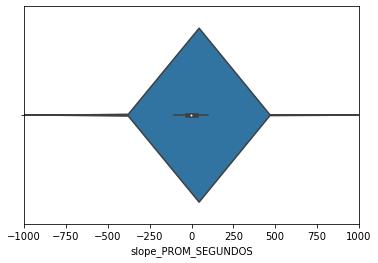

In [131]:
#sns.violinplot(ax=axs[0],x=df_serie["PORCENTAJEPL"]);
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_SEGUNDOS']);
ax.set_xlim(-1000,1000)

In [133]:
tabla_1['slope_PROM_SEGUNDOS_cat']=tabla_1['slope_PROM_SEGUNDOS']/tabla_1['avg_PROM_SEGUNDOS']

In [134]:
tabla_1[['slope_PROM_SEGUNDOS_cat']].describe()

,slope_PROM_SEGUNDOS_cat
count,583633.000
mean,-0.010
std,0.297
min,-2.000
25%,-0.111
50%,-0.005
75%,0.099
max,2.000


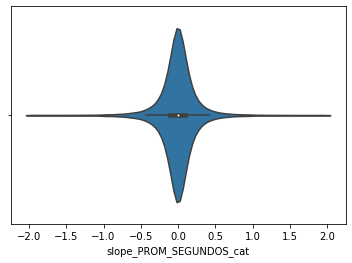

In [135]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_SEGUNDOS_cat']);

In [152]:
def categorizacion(x):
    corte_up=0.1
    corte_dw=-0.1
    if ( np.isnan(x) ):
        return np.NAN
    elif(x>corte_up):
        return "increase"
    elif(x<corte_dw):
        return "decrease"
    else:
        return "noTrend"

In [153]:
tabla_1['slope_PROM_SEGUNDOS_cat2']=tabla_1['slope_PROM_SEGUNDOS_cat'].apply(categorizacion)

In [173]:
tabla_1['slope_PROM_SEGUNDOS_cat2'].isnull().sum()

264688

In [172]:
tabla_1['slope_PROM_SEGUNDOS_cat2'].value_counts()

noTrend     281098
decrease    157872
increase    144663
Name: slope_PROM_SEGUNDOS_cat2, dtype: int64

In [155]:
tabla_1.iloc[[0,4,10]]

,CO_ID,file,IDENTIFICACION,POROUT,REGION_SIT,MUNICIPIO_SIT,DEPTO_SIT,REGION_SIT_NOCHE,MUNICIPIO_SIT_NOCHE,DEPTO_SIT_NOCHE,REGION_SIT_M1,MUNICIPIO_SIT_M1,DEPTO_SIT_M1,REGION_SIT_NOCHE_M1,MUNICIPIO_SIT_NOCHE_M1,DEPTO_SIT_NOCHE_M1,PROM_SEGUNDOS_MA,PROM_SEGUNDOS_M1,PROM_SEGUNDOS_M2,PROM_SEGUNDOS_M3,PROM_SEGUNDOS_M4,PROM_DATOS_MA,PROM_DATOS_M1,PROM_DATOS_M2,PROM_DATOS_M3,PROM_DATOS_M4,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,NOMBRE_PAQ_MAS_COMPRADO_MES,PROMEDIO_SALDO_MES,PROMEDIO_SALDO_M1,PROMEDIO_SALDO_M2,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,NOMBRE_PAQ_MAS_COMPRADO_MES_ANTERIOR,RAZON1_MA,RAZON1_M1,RAZON2_M2,RAZON3_M3,RAZON3_M4,DESACTIVACION_PORTACION_M1,DESACTIVACION_PORTACION_M2,DESACTIVACION_PORTACION_M3,DESACTIVACION_PORTACION_M4,ACTIVACION_PORTACION_M1,ACTIVACION_PORTACION_M2,ACTIVACION_PORTACION_M3,ACTIVACION_PORTACION_M4,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,slope_PROM_SEGUNDOS,slope_PROM_SEGUNDOS_cat,slope_PROM_SEGUNDOS_cat2
0,7045723,df05,41939455,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6605,NaN,NaN,NaN,NaN,NaN,NaN
4,7360814,df07,79556158,1,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,NorOccidente,Armenia,Quindio,438.707,518.259,378.987,300.661,339.817,18618.000,5489566.600,21644303.447,135.000,29484.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,3918.053,12444.077,12279.255,6576.000,0.000,1.000,2.000,-4000.000,Paquete de datos 200MB+WA,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6576,395.286,5436421.489,9547.128,41.538,0.105,increase
10,8284770,df06,52503312,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.693,418.151,571.491,622.312,NaN,1440393.385,12682.143,28668.045,1324926.370,NaN,39.000,1.000,0.000,0.000,21.000,0.000,143.000,NaN,NaN,NaN,2.650,NaN,2.650,6411.000,0.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,6442,497.912,701667.486,2.650,-88.120,-0.177,decrease


In [156]:
tabla_1['slope_PROM_DATOS']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROM_DATOS'), axis=1)
tabla_1['slope_PROMEDIO_SALDO']=tabla_1.apply(lambda x: calcSlopeRow(x,'PROMEDIO_SALDO'), axis=1)

(-10000000.0, 10000000.0)

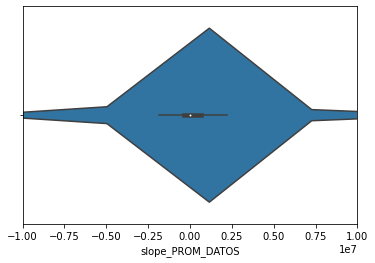

In [162]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_DATOS']);
ax.set_xlim(-10000000,10000000)

(-10000.0, 10000.0)

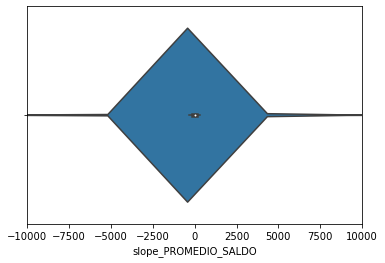

In [166]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROMEDIO_SALDO']);
ax.set_xlim(-10000,10000)

In [169]:
tabla_1['slope_PROM_DATOS_cat']=tabla_1['slope_PROM_DATOS']/tabla_1['avg_PROM_DATOS']
tabla_1['slope_PROMEDIO_SALDO_cat']=tabla_1['slope_PROMEDIO_SALDO']/tabla_1['avg_PROMEDIO_SALDO']

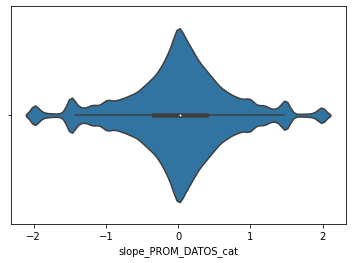

In [171]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROM_DATOS_cat']);

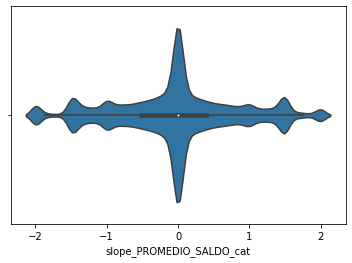

In [170]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax,x=tabla_1['slope_PROMEDIO_SALDO_cat']);
#ax.set_xlim(-10000000,10000000)

In [174]:
tabla_1['slope_PROM_DATOS_cat2']=tabla_1['slope_PROM_DATOS_cat'].apply(categorizacion)
tabla_1['slope_PROMEDIO_SALDO_cat2']=tabla_1['slope_PROMEDIO_SALDO_cat'].apply(categorizacion)

In [176]:
tabla_1['slope_PROM_DATOS_cat2'].isnull().sum()

393637

In [175]:
tabla_1['slope_PROM_DATOS_cat2'].value_counts()

increase    197747
decrease    174101
noTrend      82836
Name: slope_PROM_DATOS_cat2, dtype: int64

In [177]:
tabla_1['slope_PROMEDIO_SALDO_cat2'].isnull().sum()

433172

In [178]:
tabla_1['slope_PROMEDIO_SALDO_cat2'].value_counts()

decrease    158230
increase    141756
noTrend     115163
Name: slope_PROMEDIO_SALDO_cat2, dtype: int64

####  Recortes

In [ ]:
tabla_1.iloc[[4]]

In [ ]:
prefix='PROM_DATOS'
data=tabla_1.iloc[[4]].filter(regex='^'+prefix,axis=1).values

In [ ]:
data

In [ ]:
len(data[0])

In [ ]:
ind= list(range(0,len(data[0])))
ind

In [ ]:
list(reversed(range(0,len(data[0]))))

In [ ]:
idx=np.isfinite(ind) & np.isfinite(data)

In [ ]:
idx[0]

In [ ]:
ind

In [92]:
calcSlopeRow(tabla_1.iloc[[4]],'PROM_DATOS')

[[   18618.        5489566.6      21644303.446809      135.
     29484.4     ]]
1
vals 5
[ True  True  True  True  True]
[4, 3, 2, 1, 0]


546769.8799999995

In [ ]:
#ordenar para analisis

In [ ]:
calcSlopeRow(tabla_1.iloc[[15]],'PROM_DATOS')

In [ ]:
calcSlopeRow(tabla_1.iloc[[3]],'PROM_DATOS')

In [ ]:
calcSlopeRow(tabla_1.iloc[[11]],'PROM_DATOS')

In [ ]:
len(tabla_1)

In [98]:
tabla_1['POROUT'].value_counts()

0    647047
1    201274
Name: POROUT, dtype: int64

In [76]:
##  Ejercicio 1, SOLO POROUT
tab_1=df[df['POROUT']==1]

##  Plan
* Probar algoritmos de cluster
 * leer resultados
* Agregar variables nuevas. promedio y tendencia
* Tratar variables categoricas
* validar Binning
* Probar decision tree

In [81]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans